In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx
import seaborn as sns
import pandas as pd
import chardet
import re


tweet_data = pd.read_csv('https://raw.githubusercontent.com/Grozental11/BGU_IntroToDS/main/datasets/tweet_data.csv', encoding='latin-1')

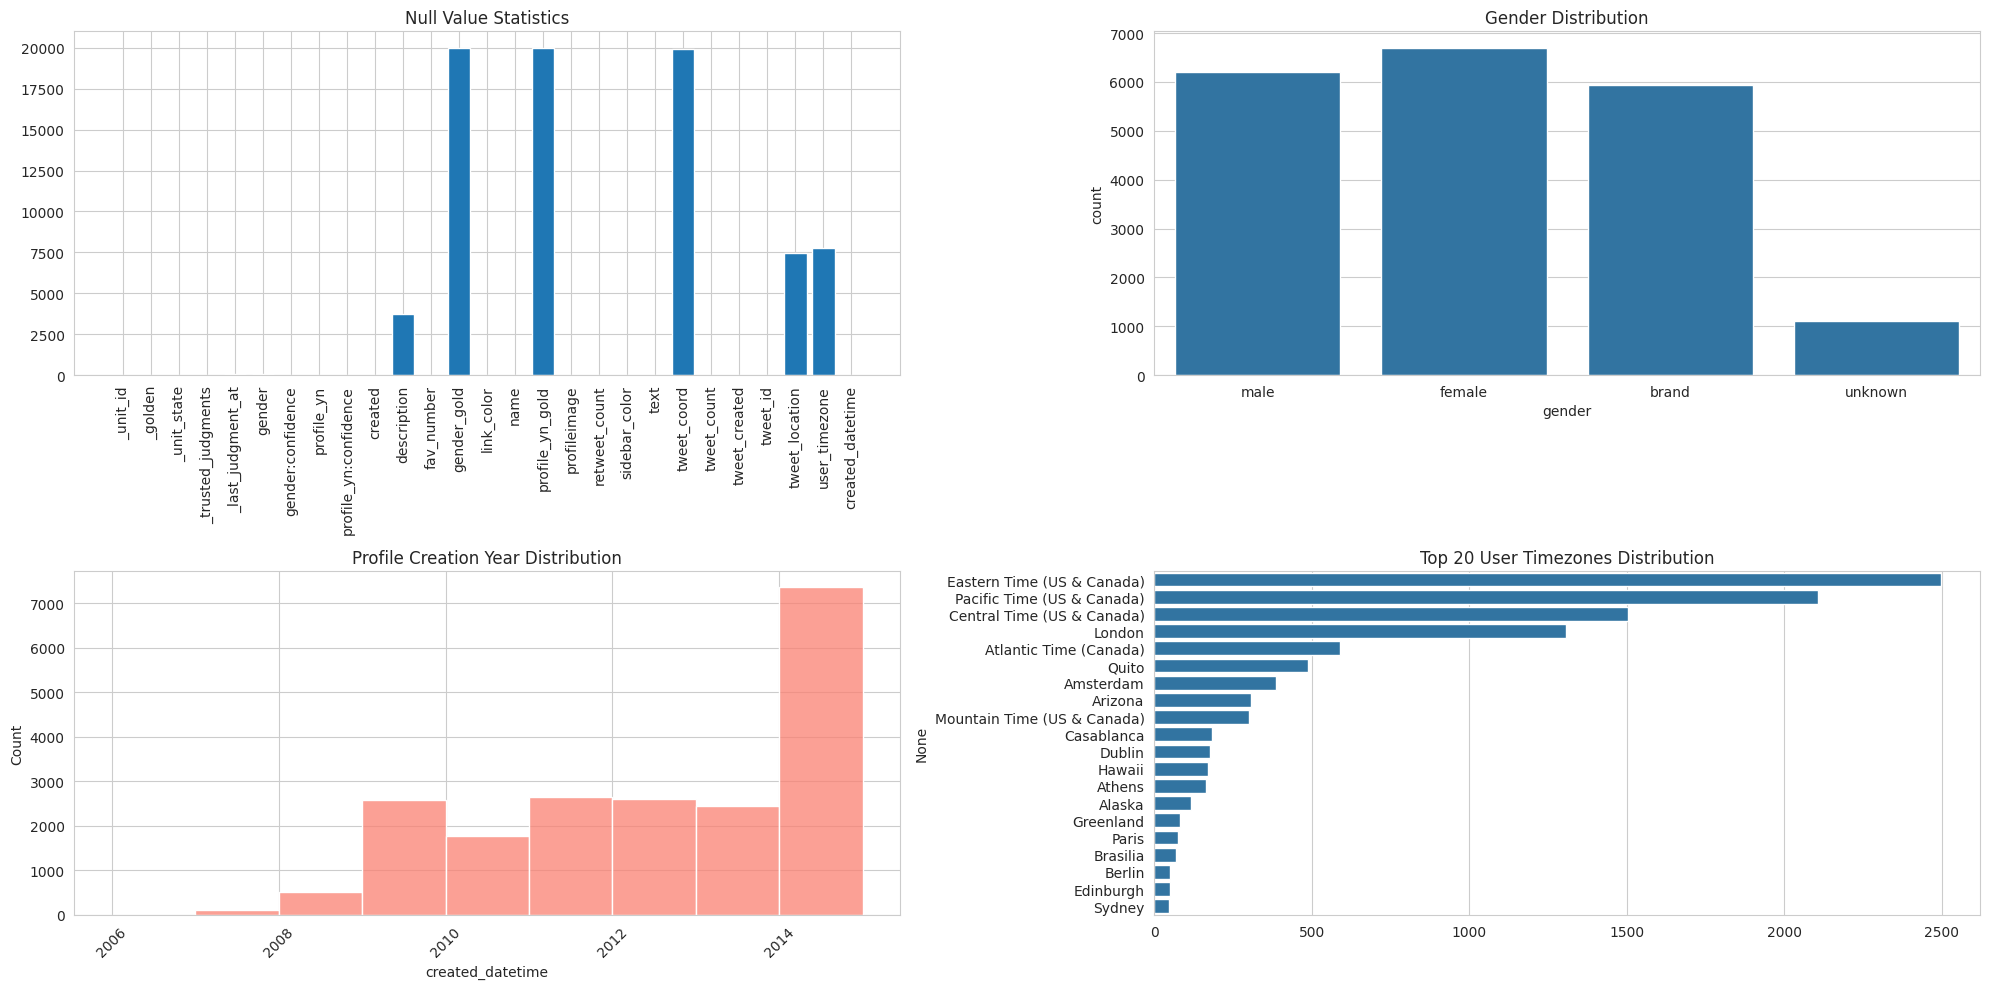

In [5]:
#Q1
def visualize_data_stats(data):
    sns.set_style("whitegrid")
    data['created_datetime'] = pd.to_datetime(data['created'], errors='coerce')
    top_timezones = data['user_timezone'].value_counts().head(20)
    created_year = data['created_datetime'].dt.year.dropna().astype(int)
    fig, axs = plt.subplots(2, 2, figsize=(20, 10), tight_layout=True)

    #Null stats
    null_dict = data.isnull().sum()
    axs[0, 0].bar(null_dict.index, null_dict.values)
    axs[0, 0].set_title('Null Value Statistics')
    axs[0, 0].tick_params(axis='x', rotation=90)

    #Gender Distribution
    sns.countplot(ax=axs[0, 1], data=data, x='gender')
    axs[0, 1].set_title('Gender Distribution')

    #Profile creation date distribution
    sns.histplot(ax=axs[1, 0], data=created_year, color='salmon', bins=range(int(created_year.min()), int(created_year.max()) + 1))
    axs[1, 0].set_title('Profile Creation Year Distribution')
    axs[1, 0].tick_params(axis='x', rotation=45)

    #User timezone distribution
    sns.barplot(ax=axs[1, 1], x=top_timezones.values, y=top_timezones.index)
    axs[1, 1].set_title('Top 20 User Timezones Distribution')

    plt.show()

visualize_data_stats(tweet_data)

In [6]:
#Q2
def clear_data(data):
    data.drop(columns = ["gender_gold", "profile_yn_gold"])
    data['description'].fillna(" ", inplace=True)
    data['tweet_coord'].fillna('[0.0, 0.0]',inplace=True)
    data['user_timezone'].fillna("unknown", inplace=True)
    data['tweet_location'].fillna("unknown", inplace=True)
    data['gender'].fillna("unknown", inplace=True)
    data['gender:confidence'].fillna(data['gender:confidence'].mean(), inplace=True)

    return data
tweet_data = clear_data(tweet_data)
clear_data(tweet_data)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,created_datetime
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,"[0.0, 0.0]",110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,2013-12-05 01:48:00
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,"[0.0, 0.0]",7471,10/26/15 12:40,6.587300e+17,unknown,Eastern Time (US & Canada),2012-10-01 13:51:00
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,1,C0DEED,i absolutely adore when louis starts the songs...,"[0.0, 0.0]",5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,2014-11-28 11:30:00
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,"[0.0, 0.0]",1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),2009-06-11 22:39:00
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,0,0,Watching Neighbours on Sky+ catching up with t...,"[0.0, 0.0]",31462,10/26/15 12:40,6.587300e+17,unknown,unknown,2014-04-16 13:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...","[0.0, 0.0]",783,10/26/15 13:20,6.587400e+17,Verona ªÁ,unknown,2015-08-05 21:16:00
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,0,0,Greg Hardy you a good player and all but don't...,"[0.0, 0.0]",13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",unknown,2012-08-15 21:17:00
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,0,C0DEED,You can miss people and still never want to se...,"[0.0, 0.0]",26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,unknown,2012-09-03 01:17:00
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,0,0,@bitemyapp i had noticed your tendency to pee ...,"[0.0, 0.0]",56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,unknown,2012-11-06 23:46:00


In [7]:
#Q3
def text_len(row_text):
  return(len(row_text))

def years_months_diff(row_date):
  now = datetime.now()
  diff_year = now.year - row_date.year
  diff_month = now.month - row_date.month
  diff_day = now.day - row_date.day

  if diff_month < 0:
      diff_year -= 1
      diff_month += 12

  if diff_day < 0:
      diff_month -= 1
      if diff_month < 0:
          diff_year -= 1
          diff_month += 12

  return f"{diff_year} years, {diff_month} months"

def add_coll(data):
  data['tweet_len'] = data['text'].apply(text_len)
  timestamp = pd.to_datetime(data['created'])
  data['time_from_created'] = timestamp.apply(years_months_diff)
  return data

add_coll(tweet_data)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,created_datetime,tweet_len,time_from_created
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,Robbie E Responds To Critics After Win Against...,"[0.0, 0.0]",110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,2013-12-05 01:48:00,109,"10 years, 2 months"
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,ÛÏIt felt like they were my friends and I was...,"[0.0, 0.0]",7471,10/26/15 12:40,6.587300e+17,unknown,Eastern Time (US & Canada),2012-10-01 13:51:00,139,"11 years, 4 months"
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,i absolutely adore when louis starts the songs...,"[0.0, 0.0]",5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,2014-11-28 11:30:00,80,"9 years, 2 months"
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,Hi @JordanSpieth - Looking at the url - do you...,"[0.0, 0.0]",1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),2009-06-11 22:39:00,138,"14 years, 8 months"
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,Watching Neighbours on Sky+ catching up with t...,"[0.0, 0.0]",31462,10/26/15 12:40,6.587300e+17,unknown,unknown,2014-04-16 13:23:00,95,"9 years, 10 months"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,"@lookupondeath ...Fine, and I'll drink tea too...","[0.0, 0.0]",783,10/26/15 13:20,6.587400e+17,Verona ªÁ,unknown,2015-08-05 21:16:00,59,"8 years, 6 months"
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,Greg Hardy you a good player and all but don't...,"[0.0, 0.0]",13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",unknown,2012-08-15 21:17:00,100,"11 years, 6 months"
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,You can miss people and still never want to se...,"[0.0, 0.0]",26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,unknown,2012-09-03 01:17:00,58,"11 years, 5 months"
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,@bitemyapp i had noticed your tendency to pee ...,"[0.0, 0.0]",56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,unknown,2012-11-06 23:46:00,97,"11 years, 3 months"


In [8]:
#Q4
def val_url(data):
  regex = r'\bhttps?://[^\s<>"]+?\.[^\s<>"]+'
  a = data['text'].str.match(regex).sum()/data['text'].count()
  return float(format(a*100, ".2f"))


print(f"{val_url(tweet_data)}%")

0.65%


In [9]:
#Q5
def ext_user_mem(data):
  regex = r'@[\w_]+'
  data['user_mention'] = data['text'].str.findall(regex)
  return data

ext_user_mem(tweet_data).head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,created_datetime,tweet_len,time_from_created,user_mention
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,"[0.0, 0.0]",110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,2013-12-05 01:48:00,109,"10 years, 2 months",[]
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,"[0.0, 0.0]",7471,10/26/15 12:40,6.587300e+17,unknown,Eastern Time (US & Canada),2012-10-01 13:51:00,139,"11 years, 4 months",[]
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,"[0.0, 0.0]",5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,2014-11-28 11:30:00,80,"9 years, 2 months",[]
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,"[0.0, 0.0]",1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),2009-06-11 22:39:00,138,"14 years, 8 months","[@JordanSpieth, @IFTTT, @PGATOUR]"
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,"[0.0, 0.0]",31462,10/26/15 12:40,6.587300e+17,unknown,unknown,2014-04-16 13:23:00,95,"9 years, 10 months",[]


In [10]:
#Q6
def ext_hash(data):
  regex = r'#[\w_]+'
  data['hashtag'] = data['text'].str.findall(regex)
  return data

ext_hash(tweet_data).head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,created_datetime,tweet_len,time_from_created,user_mention,hashtag
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,2013-12-05 01:48:00,109,"10 years, 2 months",[],[#WorldTitleSeries]
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,7471,10/26/15 12:40,6.587300e+17,unknown,Eastern Time (US & Canada),2012-10-01 13:51:00,139,"11 years, 4 months",[],"[#retired, #IAN1]"
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,2014-11-28 11:30:00,80,"9 years, 2 months",[],[]
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),2009-06-11 22:39:00,138,"14 years, 8 months","[@JordanSpieth, @IFTTT, @PGATOUR]",[]
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,31462,10/26/15 12:40,6.587300e+17,unknown,unknown,2014-04-16 13:23:00,95,"9 years, 10 months",[],[]


In [11]:
#Q7
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she",
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then",
    "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s",
    "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o",
    "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn",
    "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn",
    "wasn", "weren", "won", "wouldn"
]

def find_entities(data):
  regex = r'\b[A-Z][a-z]*\b'
  data['entities'] = data['text'].apply(lambda x: [word for word in re.findall(regex, x) if word.lower() not in stop_words])
  return data

find_entities(tweet_data).head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_created,tweet_id,tweet_location,user_timezone,created_datetime,tweet_len,time_from_created,user_mention,hashtag,entities
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,2013-12-05 01:48:00,109,"10 years, 2 months",[],[#WorldTitleSeries],"[Robbie, E, Responds, Critics, Win, Eddie, Edw..."
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,10/26/15 12:40,6.587300e+17,unknown,Eastern Time (US & Canada),2012-10-01 13:51:00,139,"11 years, 4 months",[],"[#retired, #IAN1]",[]
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,2014-11-28 11:30:00,80,"9 years, 2 months",[],[],[]
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),2009-06-11 22:39:00,138,"14 years, 8 months","[@JordanSpieth, @IFTTT, @PGATOUR]",[],"[Hi, Looking]"
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,10/26/15 12:40,6.587300e+17,unknown,unknown,2014-04-16 13:23:00,95,"9 years, 10 months",[],[],"[Watching, Neighbours, Sky, Neighbs, Xxx, Xxx]"


In [12]:
#Q8
def ext_pra_usd(data):
  regex = r'(?:\$\d+(?:\.\d+)?)|(?:\d+(?:\.\d+)?%)'
  data['percentage_or_usd'] = data['text'].str.findall(regex)
  return data

ext_pra_usd(tweet_data)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_id,tweet_location,user_timezone,created_datetime,tweet_len,time_from_created,user_mention,hashtag,entities,percentage_or_usd
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,6.587300e+17,main; @Kan1shk3,Chennai,2013-12-05 01:48:00,109,"10 years, 2 months",[],[#WorldTitleSeries],"[Robbie, E, Responds, Critics, Win, Eddie, Edw...",[]
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,6.587300e+17,unknown,Eastern Time (US & Canada),2012-10-01 13:51:00,139,"11 years, 4 months",[],"[#retired, #IAN1]",[],[]
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,6.587300e+17,clcncl,Belgrade,2014-11-28 11:30:00,80,"9 years, 2 months",[],[],[],[]
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),2009-06-11 22:39:00,138,"14 years, 8 months","[@JordanSpieth, @IFTTT, @PGATOUR]",[],"[Hi, Looking]",[]
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,6.587300e+17,unknown,unknown,2014-04-16 13:23:00,95,"9 years, 10 months",[],[],"[Watching, Neighbours, Sky, Neighbs, Xxx, Xxx]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,6.587400e+17,Verona ªÁ,unknown,2015-08-05 21:16:00,59,"8 years, 6 months",[@lookupondeath],[],[Fine],[]
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,6.587300e+17,"Kansas City, MO",unknown,2012-08-15 21:17:00,100,"11 years, 6 months",[],[],"[Greg, Hardy, Dez, Bryant, Learn]",[]
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,6.587400e+17,Lagos Nigeria,unknown,2012-09-03 01:17:00,58,"11 years, 5 months",[],[],[],[]
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,6.587300e+17,Texas Hill Country,unknown,2012-11-06 23:46:00,97,"11 years, 3 months",[@bitemyapp],[],[P],[]


In [13]:
#Q9
def user_men_count(data):
  data = ext_user_mem(data)
  new_data = pd.DataFrame()
  new_data['name'] = data['name']
  new_data['user_mention'] = data['user_mention'].apply(text_len)
  new_data = new_data.groupby(new_data['name'], as_index = False)['user_mention'].sum()

  return new_data

user_men_count(tweet_data)

,name,user_mention
0,00_tube8,0
1,01036gnla,0
2,01302gnla,0
3,0154_GUTIERREZ,0
4,01571gnla,0
...,...,...
18790,zowiekelilaa,0
18791,zquadfather,0
18792,zruxmusic,4
18793,zuli786,2


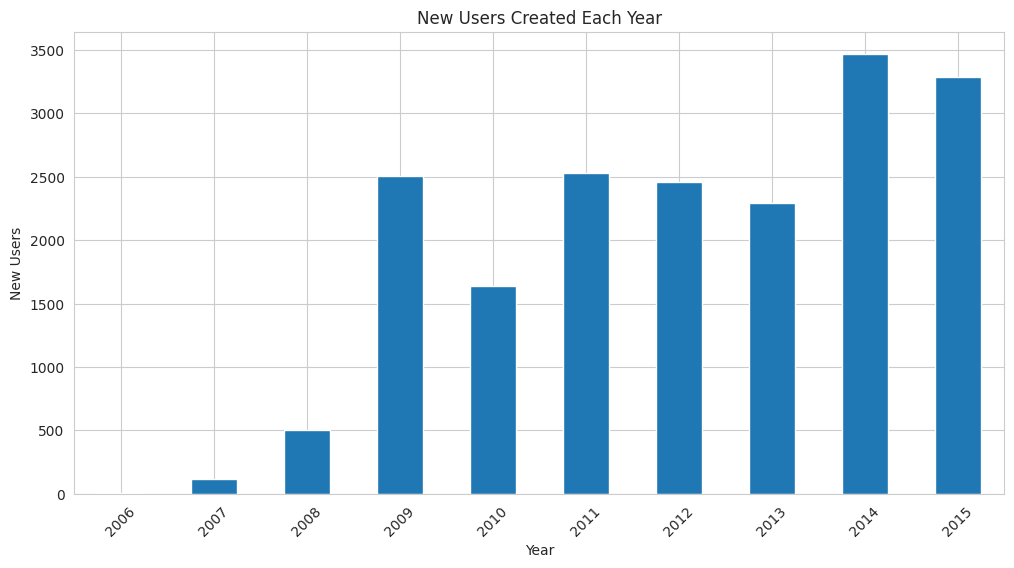

In [14]:
#Q10
tweet_data['created'] = pd.to_datetime(tweet_data['created'])
new_users_per_year = tweet_data.groupby(tweet_data['created'].dt.year)['name'].nunique()
plt.figure(figsize=(12, 6))
new_users_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('New Users')
plt.title('New Users Created Each Year')
plt.xticks(rotation=45)
plt.show()

(-0.5, 399.5, 199.5, -0.5)

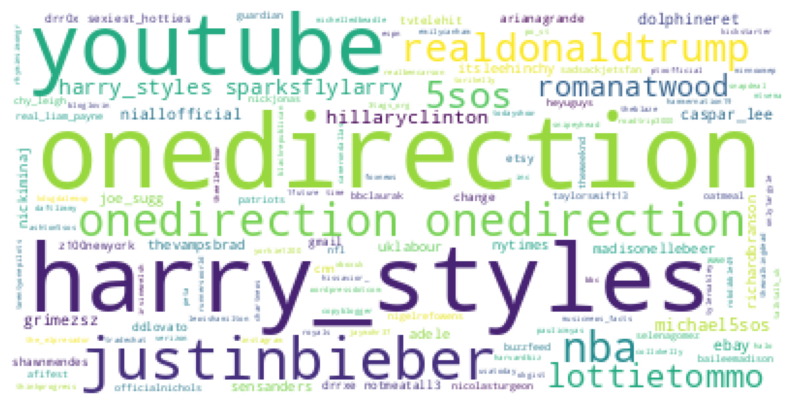

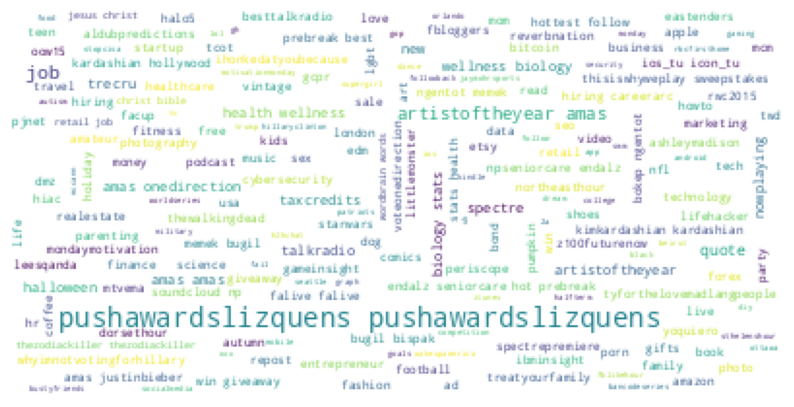

In [15]:
#Q11
from wordcloud import WordCloud

mentions = [" ".join([word.lower() for word in i]) for i in tweet_data.user_mention.dropna()]
mentions = " ".join(mentions)
wordcloud = WordCloud(background_color='white').generate(mentions)

plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

hashtags = [" ".join([word.lower() for word in i]) for i in tweet_data.hashtag.dropna()]
hashtags = " ".join(hashtags)
wordcloud2 = WordCloud(background_color='white').generate(hashtags)

plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud2)
plt.axis('off')

<Axes: xlabel='gender:confidence', ylabel='Count'>

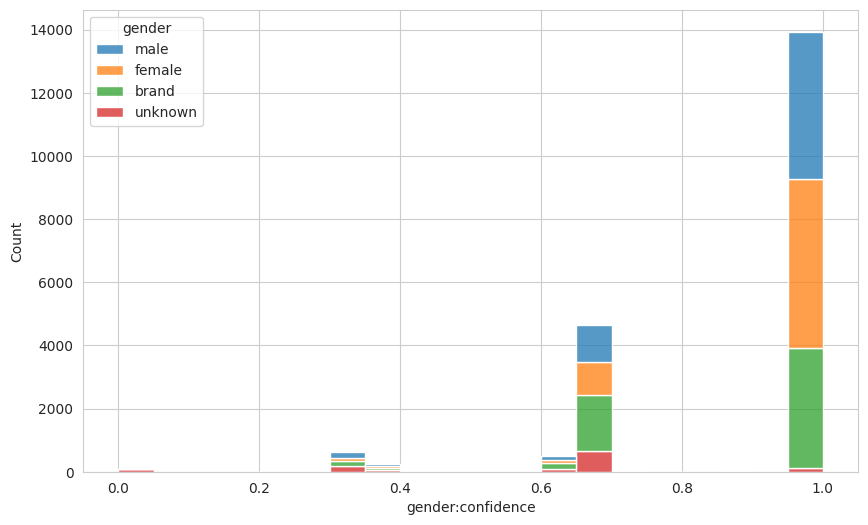

In [16]:
#Q12
data = clear_data(tweet_data)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='gender:confidence', hue='gender', multiple="stack", binwidth=0.05, kde=False)

In [17]:
#Q13
from ast import literal_eval
import folium
from folium.plugins import HeatMap

mask = data['tweet_coord'] == '[0.0, 0.0]'
data = data[~mask]

coords_data = data[data['tweet_coord'].notnull()]
coords_data['tweet_coord_parsed'] = coords_data['tweet_coord'].apply(literal_eval)
lat_long_pairs = coords_data['tweet_coord_parsed'].tolist()
map = folium.Map(location=[20, 0], zoom_start=2)
HeatMap(lat_long_pairs).add_to(map)

map